# k vecinos cercanos (kNN)

## Paquetes numpy y pandas

In [181]:
import numpy as np
import pandas as pd

### Para fines de estética en la salida, se desactivan las advertencias que pueda informar el intérprete Python

In [182]:
import warnings 
warnings.filterwarnings("ignore")

## Importación método para creación del conjunto de entrenamiento desde paquete *sklearn*

In [183]:
from sklearn.model_selection import train_test_split

## Paquete sklearn que contiene los métodos para kNN

In [184]:
# Método para k vecinos cercanos desde sklearn
from sklearn.neighbors import KNeighborsClassifier

## Lectura de los datos desde el archivo *datosAB.txt*

In [185]:
# Esta es la opción para Jupyter Lab/Notebook en desktop
datos = pd.read_table("datosAB.txt", sep='\t')


## Creación de conjunto de datos 

In [186]:
# Conjunto de datos
X = datos.iloc[:,:-1]
y = datos.iloc[:,2]

In [187]:
X

,a,b
0,168,141
1,165,143
2,170,143
3,172,145
4,174,145
5,167,147
6,174,147
7,169,149
8,170,150
9,164,151


In [188]:
y

0        rojo
1        rojo
2        rojo
3        rojo
4        rojo
5        rojo
6        rojo
7        rojo
8        rojo
9        rojo
10       rojo
11       rojo
12       rojo
13       rojo
14       rojo
15       rojo
16       rojo
17       rojo
18    naranja
19    naranja
20    naranja
21    naranja
22    naranja
23    naranja
24    naranja
25    naranja
26    naranja
27    naranja
28    naranja
29    naranja
30    naranja
31    naranja
32    naranja
33    naranja
34    naranja
35    naranja
Name: clase, dtype: object

## Creación de subconjutos CP y CE

In [189]:
# Se elige una semilla para la selección pseudo-aleatoria
semilla = 123456

In [190]:
X_ce, X_cp, y_ce, y_cp = train_test_split(X, y, test_size=0.3, random_state=semilla)

In [191]:
X_ce

,a,b
7,169,149
19,157,153
13,168,154
31,169,166
33,174,168
25,179,162
28,172,164
21,171,156
14,170,156
2,170,143


In [192]:
y_ce

7        rojo
19    naranja
13       rojo
31    naranja
33    naranja
25    naranja
28    naranja
21    naranja
14       rojo
2        rojo
6        rojo
18    naranja
15       rojo
26    naranja
20    naranja
11       rojo
12       rojo
29    naranja
10       rojo
8        rojo
4        rojo
23    naranja
32    naranja
27    naranja
1        rojo
Name: clase, dtype: object

## Creación y ajuste del clasificador con k=5

In [193]:
# Entrenamiento y ajuste
clasificador = KNeighborsClassifier(n_neighbors=5)
clasificador = clasificador.fit(X_ce, y_ce)

## Predicción

In [194]:
# Predicción del conjunto de prueba
y_pred = clasificador.predict(X_cp)

In [195]:
y_cp

16       rojo
30    naranja
0        rojo
22    naranja
35    naranja
24    naranja
3        rojo
5        rojo
9        rojo
17       rojo
34    naranja
Name: clase, dtype: object

In [196]:
y_pred

array(['naranja', 'naranja', 'rojo', 'naranja', 'naranja', 'naranja',
       'rojo', 'rojo', 'rojo', 'naranja', 'naranja'], dtype=object)

In [197]:
# Probabilidad de pertenencia a la clase rojo o naranja
y_prob = clasificador.predict_proba(X_cp)

In [198]:
X_cp

,a,b
16,176,159
30,178,165
0,168,141
22,160,155
35,160,143
24,177,161
3,172,145
5,167,147
9,164,151
17,175,162


In [199]:
# Impresión de las probabilidades

# Creación de una tabla
from prettytable import PrettyTable
probs = PrettyTable()

# Se agregan los resultados en columnas de la tabla
probs.add_column("Predicción", y_pred)
probs.add_column("Prob Naranja", y_prob[:,0])
probs.add_column("Prob Rojo", y_prob[:,1])

# Impresión de la tabla
print(probs)

+------------+--------------+-----------+
| Predicción | Prob Naranja | Prob Rojo |
+------------+--------------+-----------+
|  naranja   |     0.8      |    0.2    |
|  naranja   |     1.0      |    0.0    |
|    rojo    |     0.0      |    1.0    |
|  naranja   |     0.8      |    0.2    |
|  naranja   |     0.6      |    0.4    |
|  naranja   |     0.8      |    0.2    |
|    rojo    |     0.0      |    1.0    |
|    rojo    |     0.4      |    0.6    |
|    rojo    |     0.4      |    0.6    |
|  naranja   |     0.8      |    0.2    |
|  naranja   |     1.0      |    0.0    |
+------------+--------------+-----------+


## Creación de los resultados estadísticos de la clasificación

### Importación de método para la matriz de confusión desde paquete *sklearn*

In [200]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Cálculo de la matriz de confusión

In [201]:
mconf = confusion_matrix(y_cp, y_pred)

### Impresión de la matriz de confusión

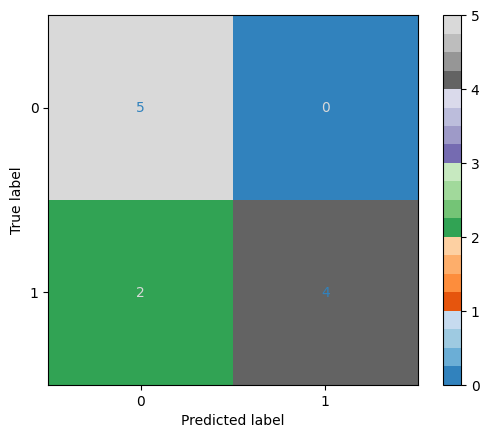

In [202]:
mconfg = ConfusionMatrixDisplay(mconf).plot(cmap='tab20c')

### Importación de método para la puntuación de precisión desde paquete *sklearn*

In [203]:
from sklearn.metrics import accuracy_score

### Cálculo de la puntuación de precisión

In [204]:
cc = accuracy_score(y_cp, y_pred)

### Impresión de la puntuación

In [205]:
print(f'Accuracy Score = {cc}')

Accuracy Score = 0.8181818181818182


## Importación de métodos para el gráfico 

In [206]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Ajuste del etiquetado de la variable y

In [207]:
# Importación del etiquetador
from sklearn.preprocessing import LabelEncoder
# Creación del etiquetador
labelencoder_y = LabelEncoder()
# Etiquetado y ajuste
y_ce = labelencoder_y.fit_transform(y_ce)

### **Nota:** Es necesario realizar el ajuste de nuevo dado que cambió la variable y debido al proceso de etiquetado

In [208]:
clasificador.fit(X_ce, y_ce)

KNeighborsClassifier()

# Se grafica todo el conjunto de datos empleando el clasificador DT para cada dato

In [209]:
# Etiquetado y ajuste del conjunto de datos original
X_set, y_set = X, labelencoder_y.fit_transform(y)

## Creación de la malla (plano cartesiano)

In [210]:
X1, X2 = np.meshgrid(
    np.arange(start = X_set.iloc[:,0].min()-1, stop = X_set.iloc[:,0].max()+1, step=0.1),
    np.arange(start = X_set.iloc[:,1].min()-1, stop = X_set.iloc[:,1].max()+1, step=0.1)
)

## Creación del gráfico

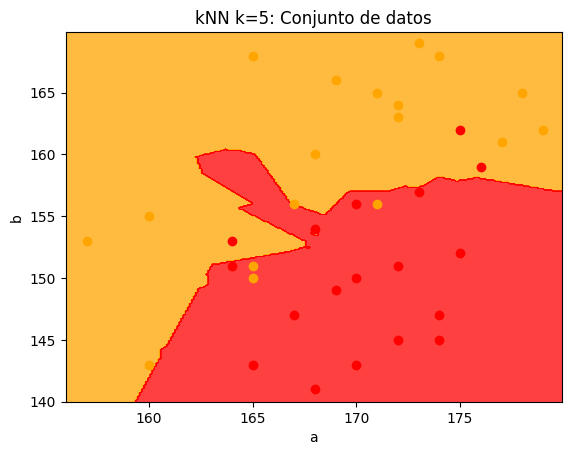

In [211]:
# Al construir la malla, se colorea la región de naranja o rojo 
# de acuerdo al clasificador DT obtenido
plt.contourf(X1, X2, 
    clasificador.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('orange', 'red'))                
)

# Se establecen los límites de los ejes x,y en el gráfico
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Se grafica cada dato en el plano cartesiano, la clase de cada dato determina el color. 
# Debido al proceso de etiquetado, 'n' fue sustituido por 0 y 'r' sustituido por 1
# 0 -> Naranja
# 1 -> Rojo
j=0
for i in y_set:
    if i==0:
        color = "orange"
    else:
        color = "red"
    plt.scatter(
        X_set.iloc[j,0],
        X_set.iloc[j,1],
        c = color,
        label = i
    )
    j=j+1

# Etiqueta del gráfico y sus ejes
plt.title('kNN k=5: Conjunto de datos')
plt.xlabel('a')
plt.ylabel('b')

# Creación del gráfico
plt.show()

# Clasificar nuevos datos con kNN

## Se clasifica un dato con el clasificador construido con kNN

dato = (160, 145)

In [212]:
# Predicción del dato = (160, 145)
x = clasificador.predict([[160, 145]])
if x==0:
    print('naranja')
else:
    print('rojo')

naranja


## Se clasifica otro dato con el clasificador construido con kNN

dato = (160, 165)

In [213]:
# Predicción del dato = (160, 165)
x = clasificador.predict([[160, 165]])
if x==0:
    print('naranja')
else:
    print('rojo')

naranja


## Ahora, a manera de prueba, se clasifica el promedio de los datos

In [214]:
# X_set es un DataFrame de pandas
X_set.mean(0)

a    169.694444
b    155.000000
dtype: float64

In [215]:
# Predicción del dato promedio = (169.6944, 155)
x = clasificador.predict([[169.6944, 155]])
if x==0:
    print('naranja')
else:
    print('rojo')

rojo
